In [1]:
using Pkg
Pkg.activate("../..")

  Activating project at `~/Documents/repos/nanoOpt.jl`


In [2]:
using Measures,LazyGrids,SpecialFunctions,LaTeXStrings,Plots; pyplot()

Plots.PyPlotBackend()

In [3]:
include("../../src/NanoOpt.jl")

KsspSlab (generic function with 1 method)

In [4]:
mat1 = material(epsdrude("Ag"),1.0)
mat2 = material(2.25,1.0)
diameter = 40.0

40.0

In [5]:
mie = miesolver(mat1,mat2,diameter,40)

λ = collect(LinRange(250,450,200))
k₀ = 2π./λ
z = 0.5*diameter+10.

30.0

## decayrate

In [6]:
k0 = k₀;

In [7]:
totx,totz,radx,radz = zeros(length(k0),length(z)),zeros(length(k0),length(z)),zeros(length(k0),length(z)),zeros(length(k0),length(z))
l = reshape(collect(1:mie.lmax),(:))

for i1 ∈ 1:length(k0)

    k₂ = mie.mat2.k(k0[i1])

    a,b = miecoefficients(mie,k0[i1])

    for i2 ∈ 1:length(z)
        x = k₂*z[i2]
        j,h,ψp,ξp = riccatibessel(x,l)

        radz[i1,i2] = 1.5*sum(l.*(l.+1).*(2*l.+1).*abs.((j + a.*h)/x).^2) 
        radx[i1,i2] = 0.75*sum((2l.+1).*(abs.(j+b.*h).^2+abs.((ψp+b.*ξp)/x).^2))
        totz[i1,i2] = 1 - 1.5*sum(real(l.*(l.+1).*(2*l.+1).*a.*(h/x).^2))
        totx[i1,i2] = 1 - 0.75*sum(real((2l.+1).*(a.*(ξp/x).^2 + b.*h.^2)))
    end
end

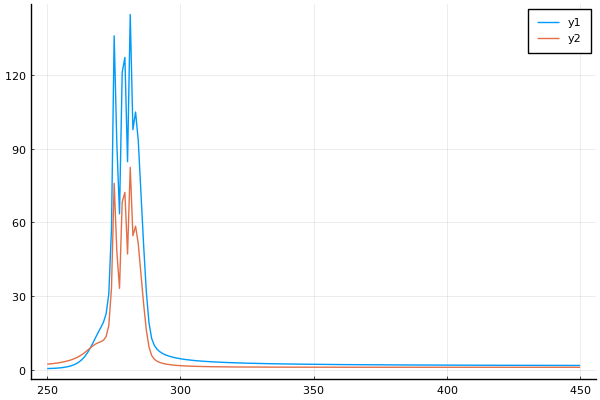

In [10]:
plot(λ,totz[:,1])
plot!(λ,totx[:,1])

In [11]:
totz

200×1 Matrix{Float64}:
 0.3796912990989232
 0.4112557669240189
 0.4545731533946138
 0.5129024688990234
 0.5905044338927677
 0.6929871587157053
 0.8277795531892294
 1.0047770878868685
 1.237212318235689
 1.5427986439072543
 1.9451561926757583
 2.4753988556300452
 3.1734288636396313
 ⋮
 1.6751411821487772
 1.6731200590109871
 1.6711272774353747
 1.669162310728981
 1.667224645336428
 1.6653137804324132
 1.663429227529306
 1.6615705100991494
 1.659737163209496
 1.6579287331724522
 1.6561447772064233
 1.654384863109965